# 1

Epoch [1000/10000], Loss: 0.2492
Epoch [2000/10000], Loss: 0.2476
Epoch [3000/10000], Loss: 0.2424
Epoch [4000/10000], Loss: 0.2278
Epoch [5000/10000], Loss: 0.2031
Epoch [6000/10000], Loss: 0.1807
Epoch [7000/10000], Loss: 0.1557
Epoch [8000/10000], Loss: 0.1098
Epoch [9000/10000], Loss: 0.0576
Epoch [10000/10000], Loss: 0.0304
Predicted: [0. 1. 1. 0.]
Actual: [0. 1. 1. 0.]


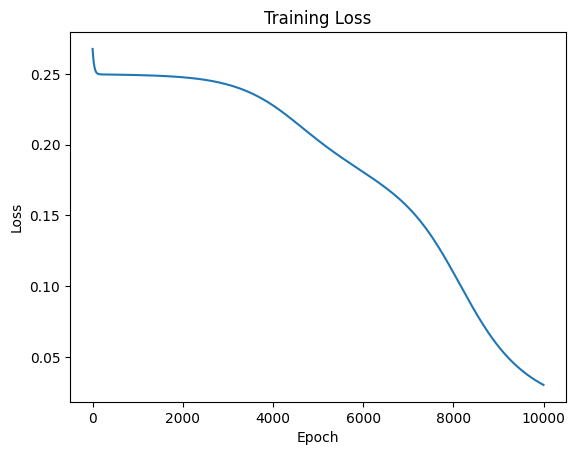

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

model = XORModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 10000
loss_values = []

for epoch in range(epochs):
    outputs = model(X)
    loss = criterion(outputs, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    predicted = model(X).round()
    print(f'Predicted: {predicted.numpy().flatten()}')
    print(f'Actual: {Y.numpy().flatten()}')

plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


# 2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

class BuiltInModel(nn.Module):
    def __init__(self):
        super(BuiltInModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.log_softmax(x)
        return x

model = BuiltInModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 10
for epoch in range(epochs):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:09<00:00, 991329.67it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 65171.11it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1093875.89it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11005504.78it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Accuracy: 94.94%


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

class CustomLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CustomLayer, self).__init__()
        self.weights = nn.Parameter(torch.randn(input_dim, output_dim))
        self.bias = nn.Parameter(torch.randn(output_dim))

    def forward(self, x):
        return torch.matmul(x, self.weights) + self.bias

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.fc1 = CustomLayer(28 * 28, 128)
        self.fc2 = CustomLayer(128, 64)
        self.fc3 = CustomLayer(64, 10)
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.log_softmax(x)
        return x

model = CustomModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 10
for epoch in range(epochs):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Accuracy: 34.42%


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

class CustomLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CustomLayer, self).__init__()
        self.weights = nn.Parameter(torch.randn(input_dim, output_dim) * 0.01)
        self.bias = nn.Parameter(torch.zeros(output_dim))

    def forward(self, x):
        return torch.matmul(x, self.weights) + self.bias

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.fc1 = CustomLayer(28 * 28, 128)
        self.fc2 = CustomLayer(128, 64)
        self.fc3 = CustomLayer(64, 10)
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.log_softmax(x)
        return x

model = CustomModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 20
for epoch in range(epochs):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Epoch [{epoch + 1}/{epochs}], Accuracy: {100 * correct / total:.2f}%')

print('Finished Training')
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Final Accuracy: {100 * correct / total:.2f}%')


Epoch [1/20], Accuracy: 91.45%
Epoch [2/20], Accuracy: 84.48%
Epoch [3/20], Accuracy: 95.02%
Epoch [4/20], Accuracy: 95.35%
Epoch [5/20], Accuracy: 93.66%
Epoch [6/20], Accuracy: 97.23%
Epoch [7/20], Accuracy: 96.10%
Epoch [8/20], Accuracy: 97.22%
Epoch [9/20], Accuracy: 97.23%
Epoch [10/20], Accuracy: 97.53%
Epoch [11/20], Accuracy: 97.60%
Epoch [12/20], Accuracy: 97.76%
Epoch [13/20], Accuracy: 97.77%
Epoch [14/20], Accuracy: 97.70%
Epoch [15/20], Accuracy: 96.69%
Epoch [16/20], Accuracy: 97.46%
Epoch [17/20], Accuracy: 96.51%
Epoch [18/20], Accuracy: 97.55%
Epoch [19/20], Accuracy: 97.53%
Epoch [20/20], Accuracy: 97.38%
Finished Training
Final Accuracy: 97.38%
